In [1]:
import os
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import anndata as ad
# import gdown
import anndata2ri
import rpy2
from rpy2.robjects import r
import random
import session_info
import matplotlib as mpl


anndata2ri.activate()
%load_ext rpy2.ipython

In [2]:
sc.settings.set_figure_params(dpi=300, frameon=False)
sc.set_figure_params(dpi=300)
sc.set_figure_params(figsize=(4, 4))

In [3]:
adata = sc.read_10x_mtx('SCP2167/expression/64265d4084cbeaef62ef36a9')

In [4]:
norm_gex = pd.read_csv('SCP2167/expression/humancortex_expression.csv.gz', index_col=0)

In [5]:
mdata = pd.read_csv('SCP2167/metadata/humancortex_metadata.csv', index_col=0)
mdata = mdata.iloc[1:,:]
# mdata

In [6]:
adata = adata[adata.obs_names.isin(mdata.index.tolist())]

In [7]:
adata.obs = mdata.loc[adata.obs_names.tolist(),:]

In [8]:
adata

AnnData object with n_obs × n_vars = 4065 × 36601
    obs: 'biosample_id', 'donor_id', 'species', 'species__ontology_label', 'disease', 'disease__ontology_label', 'organ', 'organ__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'sex', 'cluster'
    var: 'gene_ids', 'feature_types'

In [9]:
# adata.obs_names

In [10]:
norm_gex = norm_gex.loc[:,adata.obs_names.tolist()]
norm_gex.shape

(36601, 4065)

In [11]:
spatial = pd.read_csv('SCP2167/cluster/humancortex_spatial.csv', index_col = 0)
spatial = spatial.iloc[1:,:]
# spatial

In [12]:
spatial.X = spatial.X.astype('float32')
spatial.Y = spatial.Y.astype('float32')

In [13]:
adata.obsm['X_spatial'] = spatial.loc[adata.obs_names.tolist(), ['X','Y']].to_numpy()

In [14]:
adata.layers['counts'] = adata.X.copy()
adata.X = norm_gex.T.copy()

In [15]:
adata

AnnData object with n_obs × n_vars = 4065 × 36601
    obs: 'biosample_id', 'donor_id', 'species', 'species__ontology_label', 'disease', 'disease__ontology_label', 'organ', 'organ__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'sex', 'cluster'
    var: 'gene_ids', 'feature_types'
    obsm: 'X_spatial'
    layers: 'counts'

In [16]:
sc.pp.highly_variable_genes(
    adata,
    n_top_genes=500,
    subset=True,
   
)

In [17]:
adata.obs.cluster.value_counts()

Oligo          1476
Excitatory     1280
Inhibitory      387
Endothelial     281
Astrocyte       261
Microglia       216
OPC             164
Name: cluster, dtype: int64

In [18]:
col_map_newkeys = [
    'Oligo', 'Excitatory',
    'Inhibitory', 'Endothelial',
    'Astrocyte','Microglia','OPC'

]


col_map_vals = [
    



# "#E69253", "#EDB931", "#E4502E", "#4378A0", "#272A2A",
#     "#E69253", "#EDB931", "#E4502E", "#4378A0", "#272A2A",
    "#21344F", "#8AAD05", "#DF5D22", "#E17976", "#E2CE1B",
#     "#A4B7E1", "#B8B87A", "#EFBD37", "#A85E5E", "#EFDE80",
            "#42819F", "#86AA7D", "#CBB396", "#4D280F", "#555234",

    
]

In [19]:
import seaborn as sns
pal =sns.color_palette("muted")

In [20]:
print(pal.as_hex())

['#4878d0', '#ee854a', '#6acc64', '#d65f5f', '#956cb4', '#8c613c', '#dc7ec0', '#797979', '#d5bb67', '#82c6e2']


In [21]:
col_df = pd.DataFrame({'terms':col_map_newkeys, 'color_key': pal.as_hex()[0:len(col_map_newkeys)]})
col_df.index = col_df.terms

col_map = col_df.color_key.to_dict()

In [22]:
adata.obs.cluster =  adata.obs.cluster.astype('category')

In [23]:
adata.uns['cluster_colors'] = adata.obs.cluster.cat.categories.map(col_map)

In [24]:
sc.set_figure_params(figsize=(3, 3))

/home/users/allstaff/hediyehzadeh.s/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


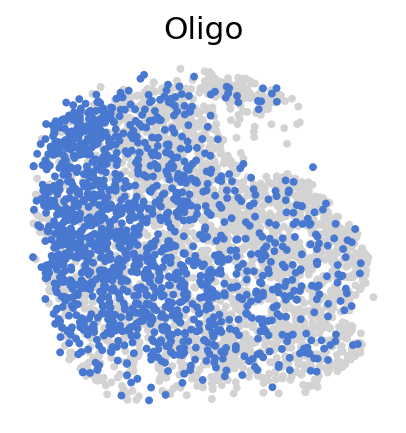

In [25]:
sc.pl.embedding(adata, basis = 'X_spatial', color='cluster', 
                groups = ['Oligo'], frameon=False, size=50,
               title = 'Oligo', legend_loc=None, save='human_cortex_slidetag_groundtruth_oligo.png')

/home/users/allstaff/hediyehzadeh.s/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


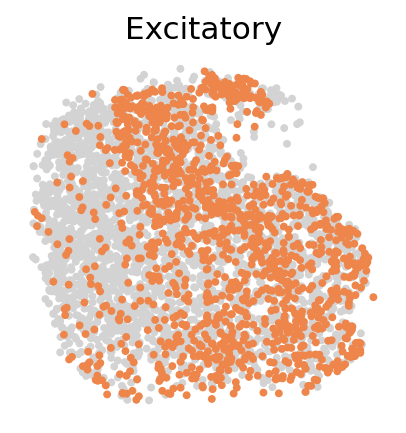

In [26]:
sc.pl.embedding(adata, basis = 'X_spatial', color='cluster', 
                groups = ['Excitatory'], frameon=False, size=50,
               title = 'Excitatory', legend_loc=None,save='human_cortex_slidetag_groundtruth_ex.png')

/home/users/allstaff/hediyehzadeh.s/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


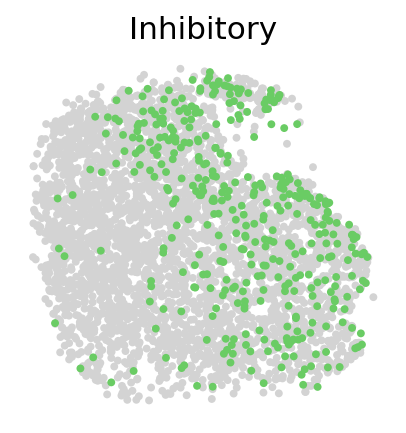

In [27]:
sc.pl.embedding(adata, basis = 'X_spatial', color='cluster', 
                groups = ['Inhibitory'], 
                frameon=False, size=50,
               title = 'Inhibitory', legend_loc=None,save='human_cortex_slidetag_groundtruth_inh.png')

/home/users/allstaff/hediyehzadeh.s/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


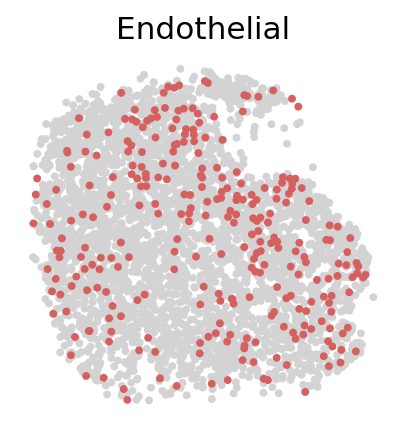

In [28]:
sc.pl.embedding(adata, basis = 'X_spatial', 
                color='cluster', groups = ['Endothelial'],
                title = 'Endothelial', legend_loc=None,
                frameon=False, size=50,save='human_cortex_slidetag_groundtruth_endo.png')

/home/users/allstaff/hediyehzadeh.s/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


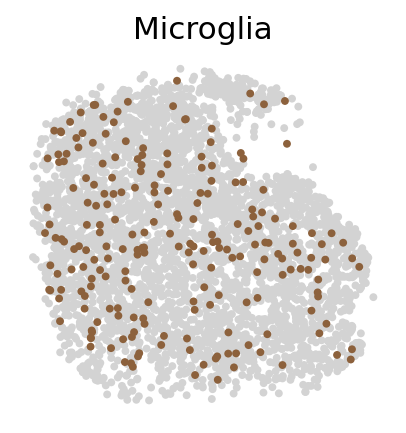

In [29]:
sc.pl.embedding(adata, basis = 'X_spatial', 
                color='cluster', groups = ['Microglia'],
                title = 'Microglia', legend_loc=None,
                frameon=False, size=50,save='human_cortex_slidetag_groundtruth_micro.png')

/home/users/allstaff/hediyehzadeh.s/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


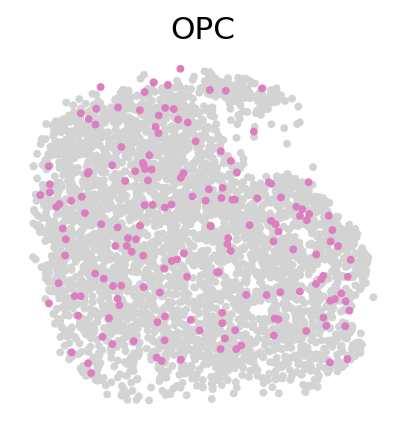

In [30]:
sc.pl.embedding(adata, basis = 'X_spatial', 
                color='cluster', groups = ['OPC'],
                title = 'OPC', legend_loc=None,
                frameon=False, size=50,save='human_cortex_slidetag_groundtruth_opc.png')

/home/users/allstaff/hediyehzadeh.s/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


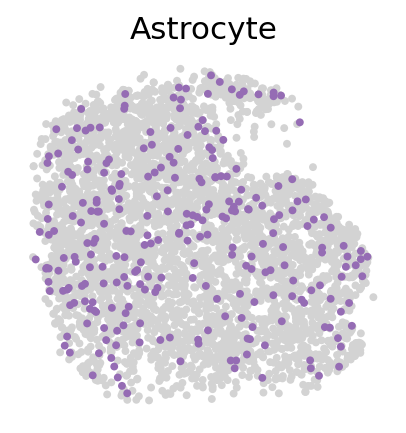

In [31]:
sc.pl.embedding(adata, basis = 'X_spatial', 
                color='cluster', groups = ['Astrocyte'],
                title = 'Astrocyte', legend_loc=None,
                frameon=False, size=50,save='human_cortex_slidetag_groundtruth_as.png')

In [32]:
sigdb = pd.read_csv('human_cortex_celltype_markers_Russell_2023.csv')
sigdb

gene celltype       min       max      diff
0            ROBO2       EX  1.254843  2.804438  1.549595
1            LRP1B       EX  1.895700  3.401358  1.505657
2           HS6ST3       EX  0.974708  2.469441  1.494733
3            EPHA6       EX  0.084586  1.431287  1.346701
4             RORB       EX  0.169270  1.502245  1.332975
...            ...      ...       ...       ...       ...
154243       FALEC      MGL  0.000000  0.011750  0.011750
154244    MIR137HG      MGL  0.000000  0.011750  0.011750
154245       CLCA2      MGL  0.000000  0.011750  0.011750
154246   TTLL7-IT1      MGL  0.000000  0.011750  0.011750
154247  AC099791.2      MGL  0.000000  0.011750  0.011750

[154248 rows x 5 columns]

In [33]:
sigdb.celltype.value_counts()

EX     29820
INH    24665
OL     22057
AS     21455
EN     20497
OPC    18302
MGL    17452
Name: celltype, dtype: int64

In [34]:
adata.var_names

Index(['AL109917.1', 'SLC2A5', 'PIK3CD-AS2', 'FAM131C', 'ID3', 'SLC2A1',
       'PIK3R3', 'IFI44L', 'ARHGAP29', 'AL137856.1',
       ...
       'PASD1', 'MT-ND1', 'MT-ND2', 'MT-CO1', 'MT-CO2', 'MT-ATP6', 'MT-CO3',
       'MT-ND4', 'MT-ND5', 'MT-ND6'],
      dtype='object', length=500)

In [35]:
# change number of markers here
celltype_sigs = pd.DataFrame(sigdb.groupby('celltype')['gene'].apply(lambda x: x[0:500].tolist()).to_dict())

In [36]:
celltype_sigs

AS          EN        EX         INH        MGL          OL  \
0         DPP10      SLC1A2     ROBO2        SGCZ    SYNDIG1        QDPR   
1    AC012405.1         PTN     LRP1B      LINGO2      RBM47     RASGRF2   
2         ROBO2     FAM107A    HS6ST3     KIRREL3  LINC02742   LINC00609   
3          KAZN       HLA-B     EPHA6       ROBO2    FAM149A         NTM   
4    AC008957.2       CALM1      RORB      THSD7A     MT-CO1     SLC5A11   
..          ...         ...       ...         ...        ...         ...   
495        GGCX       RPS25  LY86-AS1  AP001021.3      CPLX2        NPC1   
496       SYT17         FYN     NCAM2     RABGAP1      STRN3      MICAL3   
497        CD81       SRRM2      TLK1     CNTNAP4      FNIP2      DPYSL5   
498       RNF43        PCM1      CDH6       CSMD2      CNOT2  AC004797.1   
499       CALN1  AL109930.1    FAM13A       PTPRK       JAK3       MARK3   

           OPC  
0         SGCZ  
1    MIR3681HG  
2        GRIA4  
3         MAP2  
4       SEMA3E  
..         ...  
495      NXPH1  
496     CSRNP3  
497   ADAMTS17  
498     SRGAP1  
499    PHACTR1  

[500 rows x 7 columns]

In [37]:
# celltype_sigs2 = pd.DataFrame(sigdb.groupby('celltype')['gene'].apply(lambda x: x[0:50].tolist()).to_dict())

In [38]:
%%R
suppressPackageStartupMessages({
    library(SingleCellExperiment)
    library(Seurat)
    library(limma)
    library(ggplot2)
    library(miloR)
    library(ComplexHeatmap)
    library(RColorBrewer)
})

In [52]:
%%R
devtools::load_all(path="../scDECAF")

ℹ Loading scDECAF


In [53]:
cell_embedding = spatial.loc[adata.obs_names.tolist(), ['X','Y']]

In [54]:
%%R -i cell_embedding,celltype_sigs
celltype_sigs <- as.list(celltype_sigs)
# head(celltype_sigs)

In [55]:
%%R
head(cell_embedding)

                           X         Y
AAACCCAGTATCGAAA-1 4767.6396 1367.1611
AAACCCAGTCTGATAC-1 3802.1350 5263.6133
AAACGAACAAAGCAAT-1 1357.2622 4052.7036
AAACGAACACGGAAGT-1 1493.7644 1111.1707
AAACGAATCGATCCAA-1  756.1442 1794.0845
AAACGCTAGCAACTTC-1 4284.9863  903.7627


In [56]:
norm_gex = adata.X.copy()
obsnames = adata.obs_names
varnames = adata.var_names

In [57]:
%%R -i norm_gex,obsnames,varnames
x <- norm_gex
x <- t(x)
colnames(x) <- obsnames
rownames(x) <- varnames
print(x[1:10,1:10])

           AAACCCAGTATCGAAA-1 AAACCCAGTCTGATAC-1 AAACGAACAAAGCAAT-1
AL109917.1          0.0000000                  0                  0
SLC2A5              0.0000000                  0                  0
PIK3CD-AS2          0.0000000                  0                  0
FAM131C             0.0000000                  0                  0
ID3                 1.5656880                  0                  0
SLC2A1              0.8162445                  0                  0
PIK3R3              2.7815402                  0                  0
IFI44L              0.0000000                  0                  0
ARHGAP29            1.9892357                  0                  0
AL137856.1          0.0000000                  0                  0
           AAACGAACACGGAAGT-1 AAACGAATCGATCCAA-1 AAACGCTAGCAACTTC-1
AL109917.1                  0                  0                  0
SLC2A5                      0                  0                  0
PIK3CD-AS2                  0                  0

R[write to console]: Computing optimal shrinkage value by cross-validation

R[write to console]: Fitting penalized multi-response gaussian GLM with alpha 0.011

R[write to console]: Returning selected genesets with non-zero regression coefficients



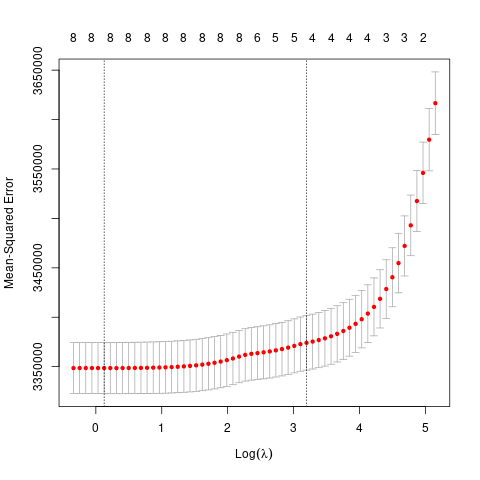

In [58]:
%%R
selected_gs <- pruneGenesets(data = x, genesetlist = celltype_sigs, hvg = rownames(x),
                            embedding = cell_embedding, min_gs_size = 3, lambda = exp(-4.5)) 

In [59]:
%%R

target <- genesets2ids(x, celltype_sigs)


ann_res <- scDECAF(data = x, gs = target, standardize = FALSE, 
                   hvg = rownames(x), k = 15, embedding = cell_embedding,
                   n_components = ncol(target) - 1, max_iter = 2, thresh = 0.5)

R[write to console]: Learning geneset representations by CCA using 6 dimensions...




 Permutation  1  out of  10  12345678910
 Permutation  2  out of  10  12345678910
 Permutation  3  out of  10  12345678910
 Permutation  4  out of  10  12345678910
 Permutation  5  out of  10  12345678910
 Permutation  6  out of  10  12345678910
 Permutation  7  out of  10  12345678910
 Permutation  8  out of  10  12345678910
 Permutation  9  out of  10  12345678910
 Permutation  10  out of  10  12345678910
1234567
1234567
123456789101112131415
123456789101112131415
123456789101112131415
1234567891011


R[write to console]: Assigning cells to genesets in latent space...

R[write to console]: Verifying assignments by weighted k-nn...

R[write to console]: using 15 nearest neighbors and confidence threshold 0.5

R[write to console]: cell-geneset assignment completed.



In [60]:
%%R
scores = attributes(ann_res)$raw_scores
dim(scores)

[1] 4063    7


In [61]:
%%R
print(head(ann_res))

                cell pred_celltype     score reassigned_celltype  uncertainty
1 AAACCCAGTATCGAAA-1            EN 0.9458916                 INH 3.291815e-04
2 AAACCCAGTCTGATAC-1            EX 0.9601386                  EX 0.000000e+00
3 AAACGAACAAAGCAAT-1            OL 0.9950339                  OL 0.000000e+00
4 AAACGAACACGGAAGT-1           MGL 0.6872442                 INH 3.130829e-14
5 AAACGAATCGATCCAA-1            OL 0.9918790                  OL 0.000000e+00
6 AAACGCTAGCAACTTC-1            EX 0.8874917                  EX 0.000000e+00
  prop_neighbourhood_preserved dist_to_centroid
1                        0.070                1
2                        0.135                1
3                        0.090                1
4                        0.085                1
5                        0.065                0
6                        0.095                0


In [62]:
%%R -o celltype_preds
celltype_preds = ann_res[,c('pred_celltype','reassigned_celltype')]
rownames(celltype_preds) = ann_res$cell

In [63]:
%%R
print(head(celltype_preds))

                   pred_celltype reassigned_celltype
AAACCCAGTATCGAAA-1            EN                 INH
AAACCCAGTCTGATAC-1            EX                  EX
AAACGAACAAAGCAAT-1            OL                  OL
AAACGAACACGGAAGT-1           MGL                 INH
AAACGAATCGATCCAA-1            OL                  OL
AAACGCTAGCAACTTC-1            EX                  EX


In [64]:
%%R
scores = data.frame(scores)

In [65]:
%%R -o scores
print(head(scores))

                            AS           EN        EX         INH         MGL
AAACCCAGTATCGAAA-1 -0.06327415  0.945891582 0.2326358 0.188980602 0.098513575
AAACCCAGTCTGATAC-1  0.02681257  0.204797585 0.9601386 0.644076005 0.094026258
AAACGAACAAAGCAAT-1  0.10476252 -0.037064168 0.2066544 0.303637474 0.008668996
AAACGAACACGGAAGT-1  0.44151679 -0.508194867 0.2365612 0.002912034 0.687244218
AAACGAATCGATCCAA-1  0.10533902  0.003262789 0.2265614 0.309667719 0.016439114
AAACGCTAGCAACTTC-1  0.28163623 -0.027089326 0.8874917 0.623313139 0.369100977
                           OL         OPC
AAACCCAGTATCGAAA-1 0.11416658  0.17161869
AAACCCAGTCTGATAC-1 0.02751169 -0.14914774
AAACGAACAAAGCAAT-1 0.99503394  0.45288059
AAACGAACACGGAAGT-1 0.12443453 -0.15495070
AAACGAATCGATCCAA-1 0.99187898  0.44567737
AAACGCTAGCAACTTC-1 0.07793771 -0.06992804


In [66]:
adata.obs[scores.columns] = scores

In [67]:
adata.obs[celltype_preds.columns] = celltype_preds

In [68]:
# adata.obs

In [69]:
# cmap = mpl.colors.LinearSegmentedColormap.from_list("", ["lightgray",'#7ec0e4','#2e79ba'])
cmap = mpl.colors.LinearSegmentedColormap.from_list("", ["lightgray",'lightgray','#2e79ba'])



gns = mpl.cm.Reds
gns.set_bad('lightgray')
gns.set_under('lightgray')


/tmp/ipykernel_7283/2342513398.py:7: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Reds").copy()
  gns.set_bad('lightgray')
/tmp/ipykernel_7283/2342513398.py:8: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Reds").copy()
  gns.set_under('lightgray')


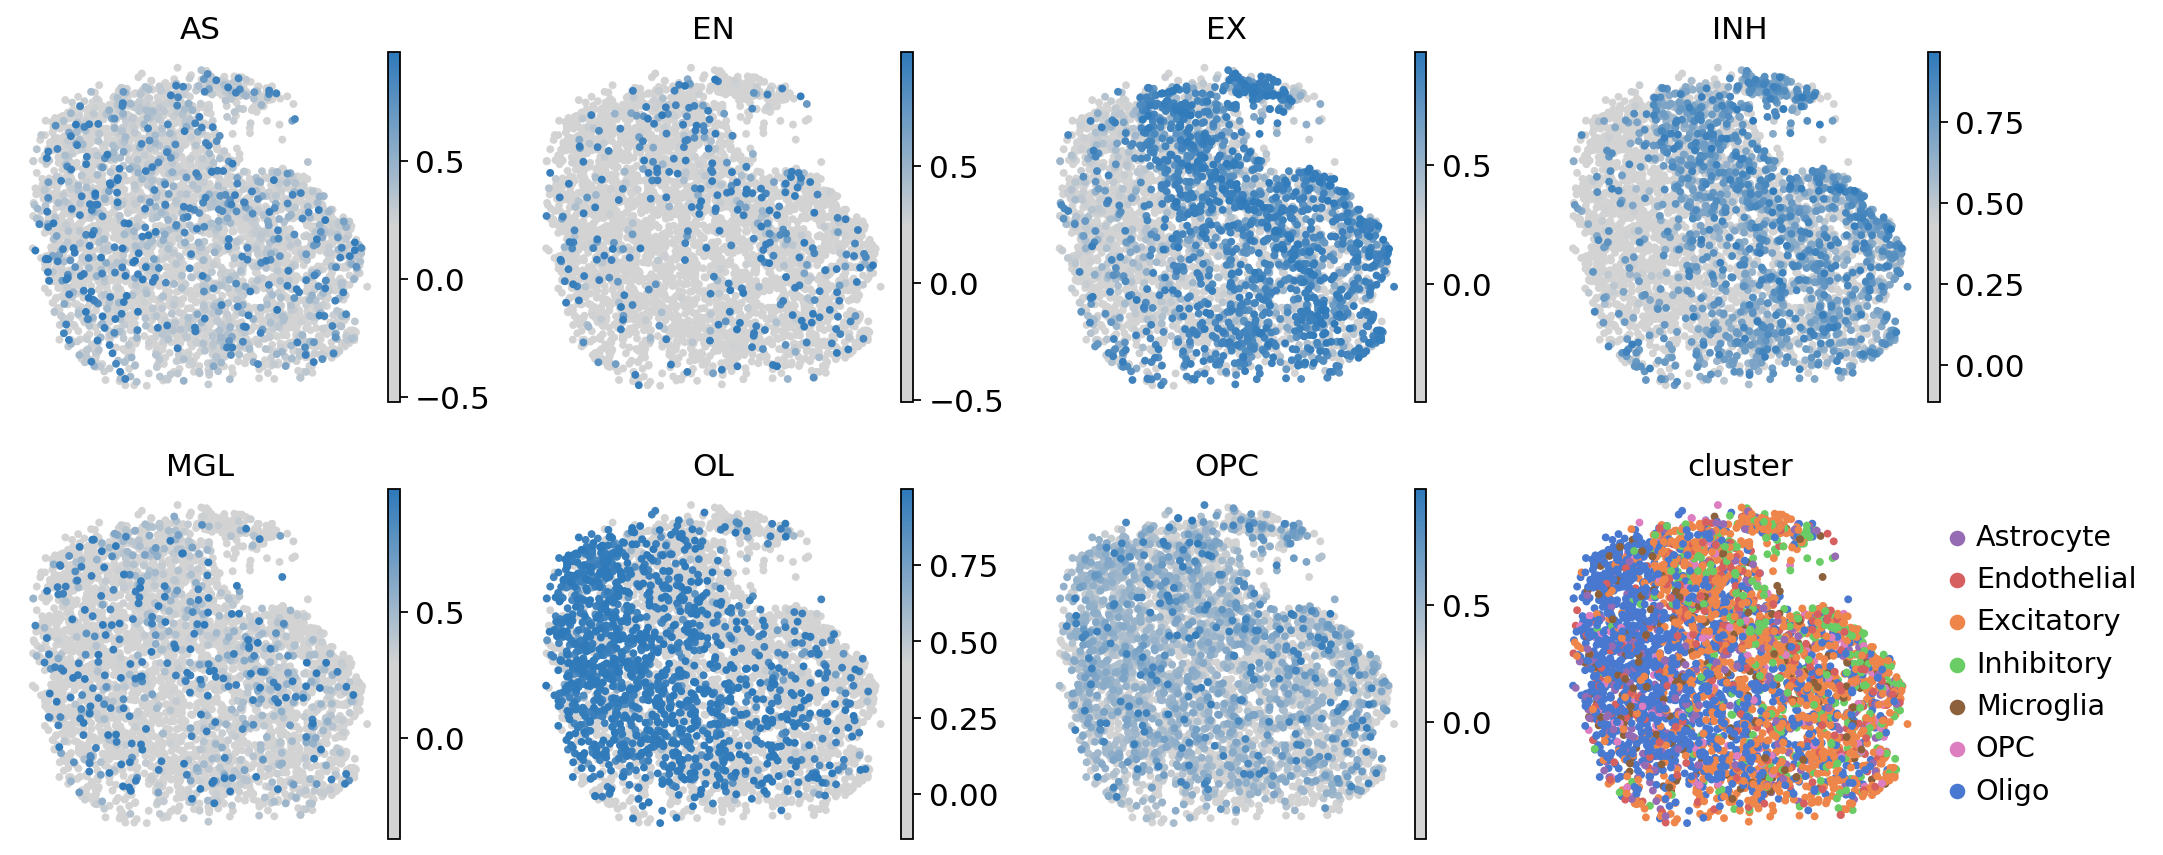

In [75]:
sc.pl.embedding(adata, basis = 'X_spatial', color = scores.columns.tolist() + ['cluster'],
               color_map=cmap, frameon=False, size =50)

/home/users/allstaff/hediyehzadeh.s/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)
/home/users/allstaff/hediyehzadeh.s/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)
/home/users/allstaff/hediyehzadeh.s/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


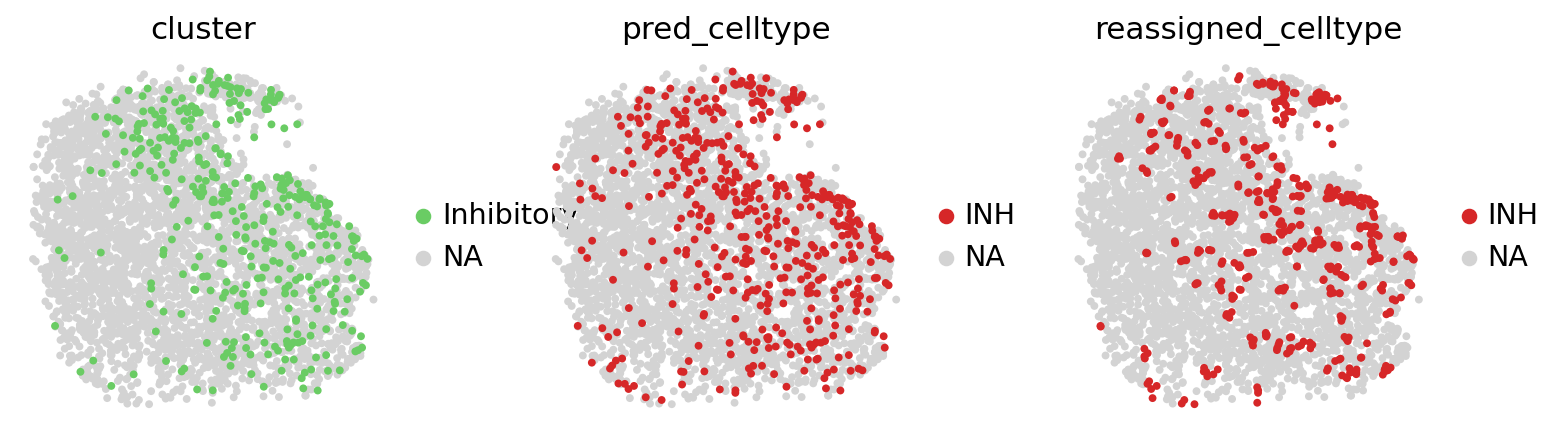

In [71]:
sc.pl.embedding(adata, basis = 'X_spatial', color = ['cluster','pred_celltype','reassigned_celltype'],
               color_map=cmap, frameon=False, size =50, groups = ['INH','Inhibitory'])

/home/users/allstaff/hediyehzadeh.s/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)
/home/users/allstaff/hediyehzadeh.s/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)
/home/users/allstaff/hediyehzadeh.s/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


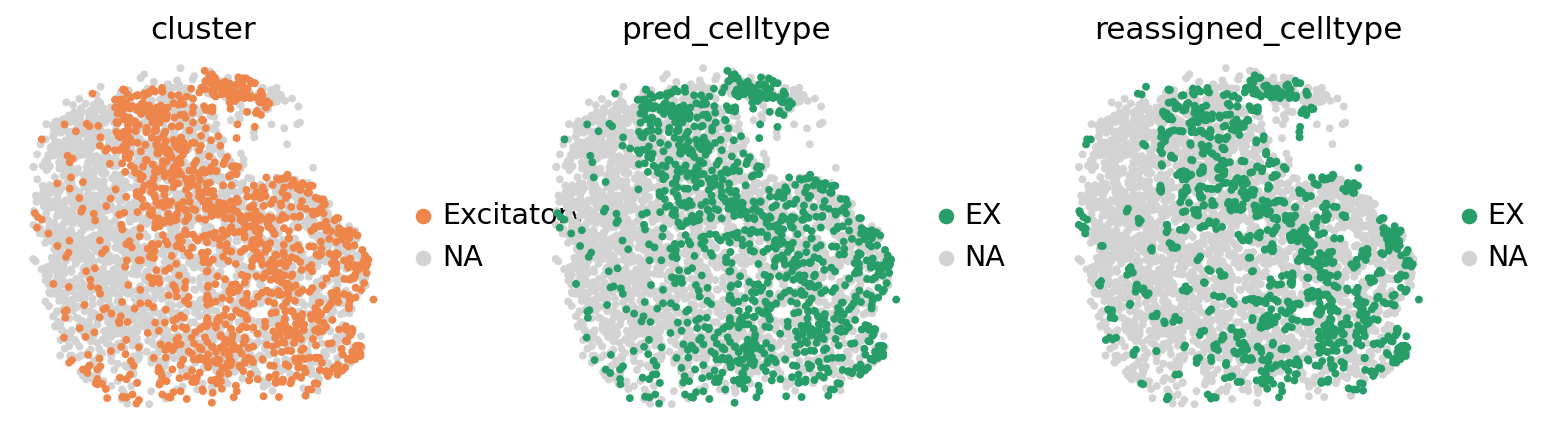

In [72]:
sc.pl.embedding(adata, basis = 'X_spatial', color = ['cluster','pred_celltype','reassigned_celltype'],
               color_map=cmap, frameon=False, size =50, groups = ['Excitatory','EX'])

/home/users/allstaff/hediyehzadeh.s/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)
/home/users/allstaff/hediyehzadeh.s/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)
/home/users/allstaff/hediyehzadeh.s/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


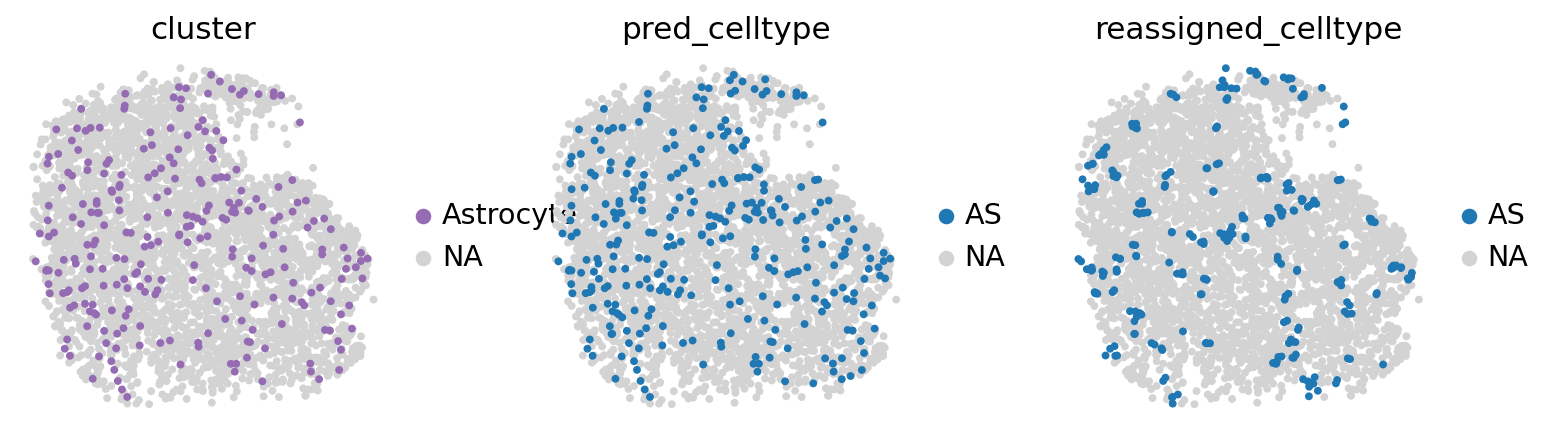

In [73]:
sc.pl.embedding(adata, basis = 'X_spatial',color = ['cluster','pred_celltype','reassigned_celltype'],
               color_map=cmap, frameon=False, size =50, groups = ['Astrocyte','AS'])

/home/users/allstaff/hediyehzadeh.s/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)
/home/users/allstaff/hediyehzadeh.s/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)
/home/users/allstaff/hediyehzadeh.s/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


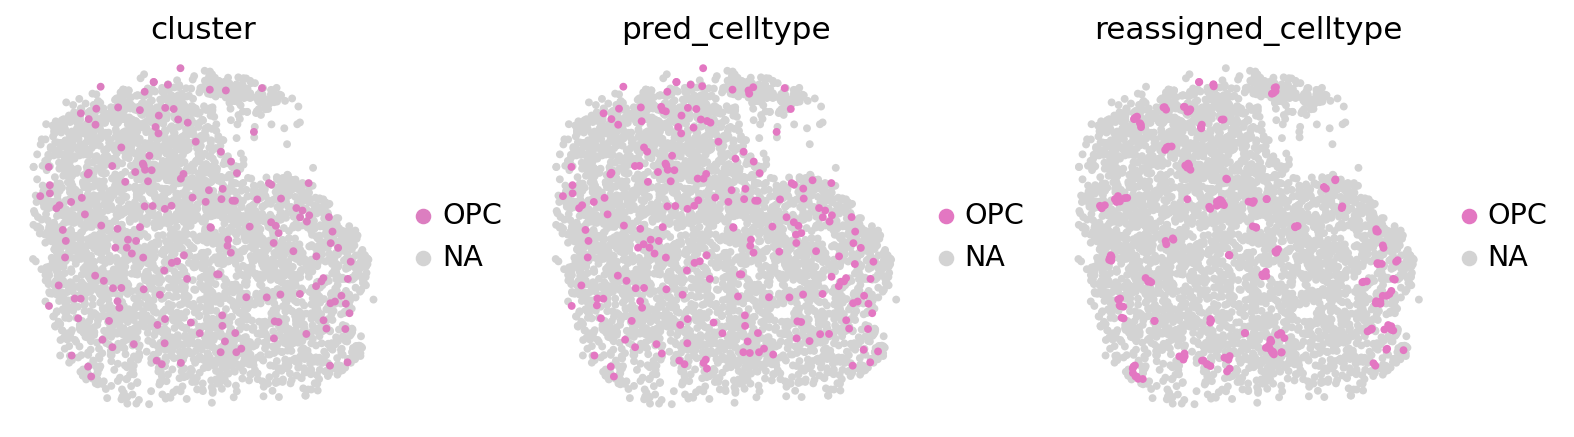

In [74]:
sc.pl.embedding(adata, basis = 'X_spatial',color = ['cluster','pred_celltype','reassigned_celltype'],
               color_map=cmap, frameon=False, size =50, groups = ['OPC'])

/home/users/allstaff/hediyehzadeh.s/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)
/home/users/allstaff/hediyehzadeh.s/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)
/home/users/allstaff/hediyehzadeh.s/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


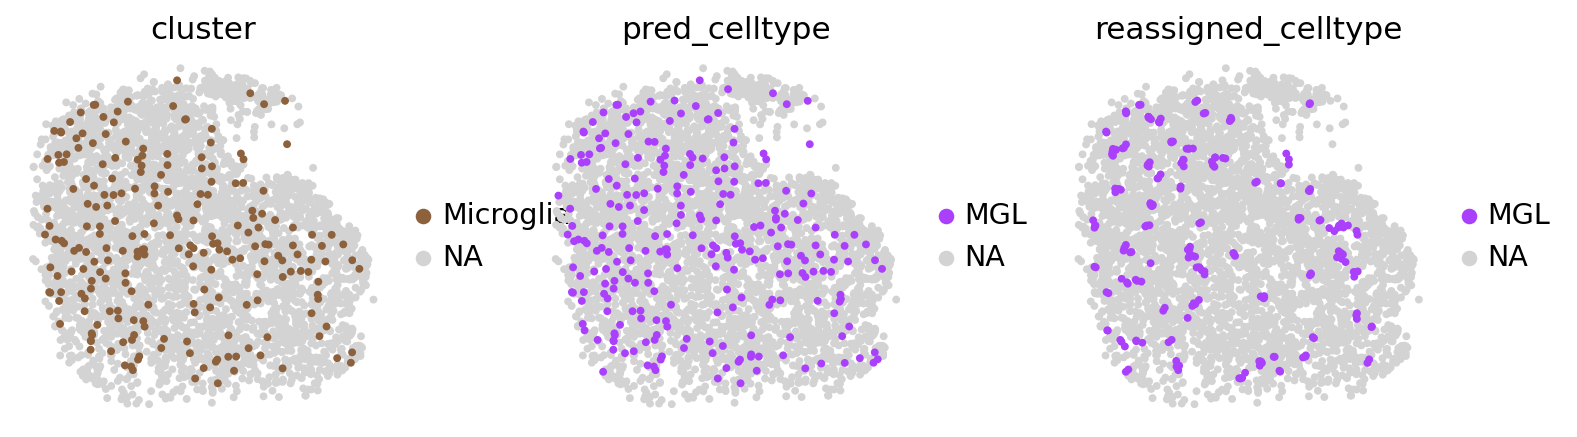

In [76]:
sc.pl.embedding(adata, basis = 'X_spatial',color = ['cluster','pred_celltype','reassigned_celltype'],
               color_map=cmap, frameon=False, size =50, groups = ['MGL','Microglia'])

In [77]:
pd.crosstab(adata.obs.cluster, adata.obs.pred_celltype)

pred_celltype   AS   EN    EX  INH  MGL    OL  OPC  unassigned
cluster                                                       
Astrocyte      255    0     0    0    0     1    5           0
Endothelial     13  255     3    0    7     1    2           0
Excitatory      24    5  1093  137   16     0    5           0
Inhibitory       2    0    23  342    2     0   18           0
Microglia        0    0     0    0  211     4    1           0
OPC              0    0     0    0    0     0  164           0
Oligo            5    6    10    2   14  1434    3           2

In [78]:
cmap = mpl.colors.LinearSegmentedColormap.from_list("", ["lightgray",'lightgray','#3D246C'])



gns = mpl.cm.Reds
gns.set_bad('lightgray')
gns.set_under('lightgray')


/tmp/ipykernel_7283/879239969.py:6: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Reds").copy()
  gns.set_bad('lightgray')
/tmp/ipykernel_7283/879239969.py:7: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Reds").copy()
  gns.set_under('lightgray')


In [79]:
adata.uns['pred_celltype_colors'] = pd.Index(['#3D246C']*7)

In [80]:
adata

AnnData object with n_obs × n_vars = 4065 × 500
    obs: 'biosample_id', 'donor_id', 'species', 'species__ontology_label', 'disease', 'disease__ontology_label', 'organ', 'organ__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'sex', 'cluster', 'AS', 'EN', 'EX', 'INH', 'MGL', 'OL', 'OPC', 'pred_celltype', 'reassigned_celltype'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'cluster_colors', 'pred_celltype_colors', 'reassigned_celltype_colors'
    obsm: 'X_spatial'
    layers: 'counts'

In [81]:
adata.uns['pred_celltype_colors']

Index(['#3D246C', '#3D246C', '#3D246C', '#3D246C', '#3D246C', '#3D246C',
       '#3D246C'],
      dtype='object')

In [82]:
adata.uns['cluster_colors']

Index(['#956cb4', '#d65f5f', '#ee854a', '#6acc64', '#8c613c', '#dc7ec0',
       '#4878d0'],
      dtype='object')

In [83]:
pred_col = dict(zip(adata.obs.pred_celltype.cat.categories.tolist(),['#3D246C']*7 ))

In [84]:
pred_col

{'AS': '#3D246C',
 'EN': '#3D246C',
 'EX': '#3D246C',
 'INH': '#3D246C',
 'MGL': '#3D246C',
 'OL': '#3D246C',
 'OPC': '#3D246C'}

In [85]:
pred_col['unassigned'] = '#4477CE'

/home/users/allstaff/hediyehzadeh.s/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


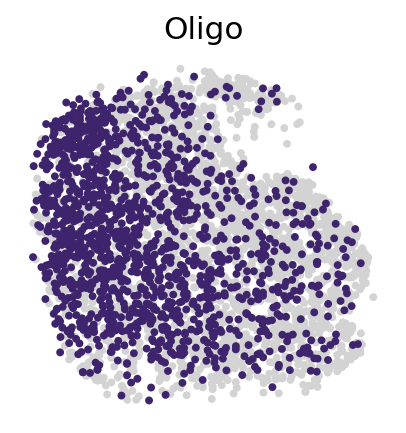

In [86]:
sc.pl.embedding(adata, basis = 'X_spatial', color='pred_celltype', 
                palette = pred_col,
                groups = ['OL'], frameon=False, size=50,
               
               title = 'Oligo', legend_loc=None, save='human_cortex_slidetag_preds_oligo.png')

/home/users/allstaff/hediyehzadeh.s/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


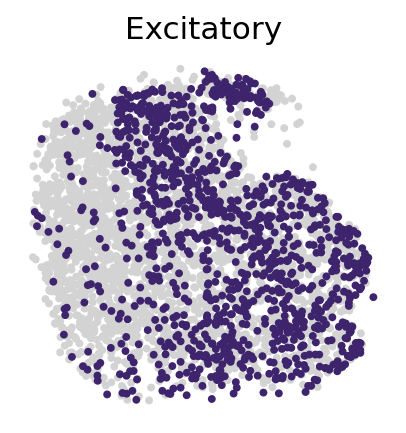

In [87]:
sc.pl.embedding(adata, basis = 'X_spatial', color='pred_celltype', 
                groups = ['EX'], frameon=False, size=50,
               title = 'Excitatory', legend_loc=None,save='human_cortex_slidetag_preds_ex.png')

/home/users/allstaff/hediyehzadeh.s/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


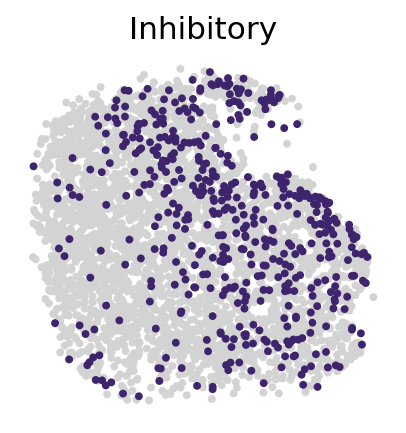

In [88]:
sc.pl.embedding(adata, basis = 'X_spatial', color='pred_celltype', 
                groups = ['INH'], 
                frameon=False, size=50,
               title = 'Inhibitory', legend_loc=None,save='human_cortex_slidetag_preds_inh.png')

/home/users/allstaff/hediyehzadeh.s/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


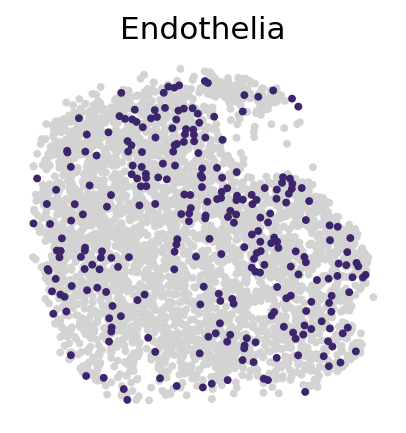

In [89]:
sc.pl.embedding(adata, basis = 'X_spatial', 
                color='pred_celltype', groups = ['EN'],
                title = 'Endothelia', legend_loc=None,
                frameon=False, size=50,save='human_cortex_slidetag_preds_endo.png')

/home/users/allstaff/hediyehzadeh.s/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


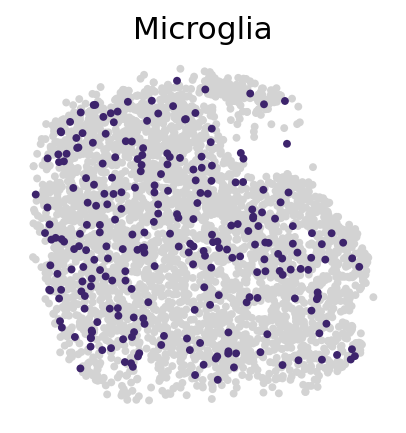

In [90]:
sc.pl.embedding(adata, basis = 'X_spatial', 
                color='pred_celltype', groups = ['MGL'],
                title = 'Microglia', legend_loc=None,
                frameon=False, size=50,save='human_cortex_slidetag_preds_micro.png')

/home/users/allstaff/hediyehzadeh.s/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


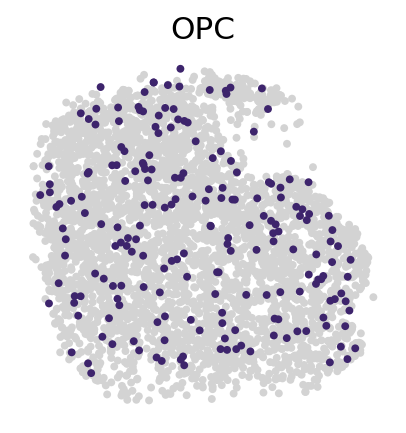

In [91]:
sc.pl.embedding(adata, basis = 'X_spatial', 
                color='pred_celltype', groups = ['OPC'],
                title = 'OPC', legend_loc=None,
                frameon=False, size=50,save='human_cortex_slidetag_preds_opc.png')

/home/users/allstaff/hediyehzadeh.s/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


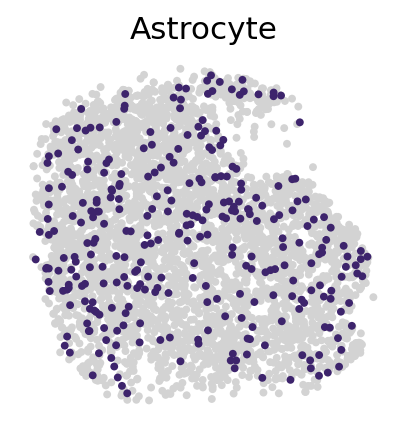

In [92]:
sc.pl.embedding(adata, basis = 'X_spatial', 
                color='pred_celltype', groups = ['AS'],
                title = 'Astrocyte', legend_loc=None,
                frameon=False, size=50,save='human_cortex_slidetag_preds_as.png')

In [96]:
tab = pd.crosstab(adata.obs.cluster, adata.obs.pred_celltype)
# drop last column
tab.drop(columns = ['unassigned'], inplace=True)
col_order = ['AS','EN','EX','INH','MGL','OPC','OL']
tab = tab.loc[:,col_order]

In [109]:
tab

pred_celltype   AS   EN    EX  INH  MGL  OPC    OL
cluster                                           
Astrocyte      255    0     0    0    0    5     1
Endothelial     13  255     3    0    7    2     1
Excitatory      24    5  1093  137   16    5     0
Inhibitory       2    0    23  342    2   18     0
Microglia        0    0     0    0  211    1     4
OPC              0    0     0    0    0  164     0
Oligo            5    6    10    2   14    3  1434

In [110]:
np.diag(tab).sum() / tab.to_numpy().sum()

0.9239478218065469

In [112]:
tab2 = tab/tab.sum(0)
tab2.sum(0)

pred_celltype
AS     1.0
EN     1.0
EX     1.0
INH    1.0
MGL    1.0
OPC    1.0
OL     1.0
dtype: float64

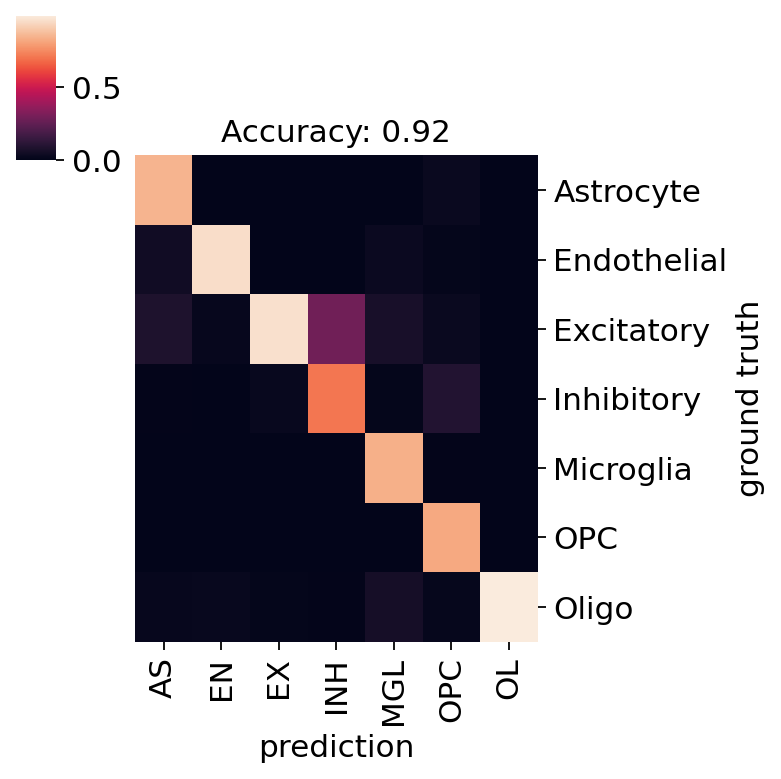

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.clustermap(tab2,  figsize=(5, 5), col_cluster=False, row_cluster=False)
g.ax_heatmap.set_title('Accuracy: 0.92')

ax = g.ax_heatmap
ax.set_xlabel("prediction")
ax.set_ylabel("ground truth")
plt.savefig('figures/heatmap_confusion_matrix.png',bbox_inches='tight')
